<a href="https://colab.research.google.com/github/CharanLawha/Practice/blob/main/Heart_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [3]:
df.sample(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
222,12689,Female,63.0,0,0,Yes,Govt_job,Rural,205.35,42.2,formerly smoked,1
1168,69312,Female,48.0,0,0,Yes,Self-employed,Urban,99.29,31.2,never smoked,0
1579,30214,Male,23.0,0,0,No,Private,Rural,83.86,19.5,never smoked,0
1744,66592,Male,16.0,0,0,No,Private,Rural,122.46,18.7,never smoked,0
229,69959,Female,80.0,1,0,No,Private,Urban,66.03,35.4,never smoked,1
356,5973,Male,43.0,0,0,Yes,Private,Urban,86.78,23.5,smokes,0
1917,10390,Female,8.0,0,0,No,children,Urban,67.33,16.7,Unknown,0
3881,65944,Female,47.0,0,0,Yes,Self-employed,Urban,105.88,39.9,smokes,0


In [4]:
df.drop('id' , axis=1 , inplace=True)

In [5]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df['age']=df['age'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [12]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [13]:
df['bmi'].fillna(df['bmi'].mode()[0] , inplace=True)

/tmp/ipython-input-13-3589784544.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mode()[0] , inplace=True)


In [18]:
df['work_type'].value_counts()

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


In [17]:
df['ever_married'].value_counts()

,count
ever_married,
Yes,3353
No,1757


In [19]:
print(df['gender'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [30]:
df['ever_married'].replace({'Yes':1,'No':0}, inplace=True)
df['gender'].replace({'Male':1,'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1,'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':1,'never smoked':0 , 'Unknown':2 , 'smokes':3}, inplace=True)
df['work_type'].replace({'Private':0 , 'Self-employed':1 , 'Govt_job':2,'Never_worked':3}, inplace=True)


/tmp/ipython-input-30-1010117183.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_status'].replace({'formerly smoked':1,'never smoked':0 , 'Unknown':2 , 'smokes':3}, inplace=True)


In [24]:
df['work_type'].replace({'children':4}, inplace=True)

/tmp/ipython-input-24-716929302.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['work_type'].replace({'children':4}, inplace=True)


In [25]:
df.sample(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3498,0,43,0,0,1,2,0,81.77,25.4,0,0
4903,0,14,0,0,0,0,0,83.56,33.1,2,0
5066,0,37,0,0,0,0,1,118.41,25.1,0,0
383,1,5,0,0,0,4,0,85.84,16.4,2,0


<Axes: >

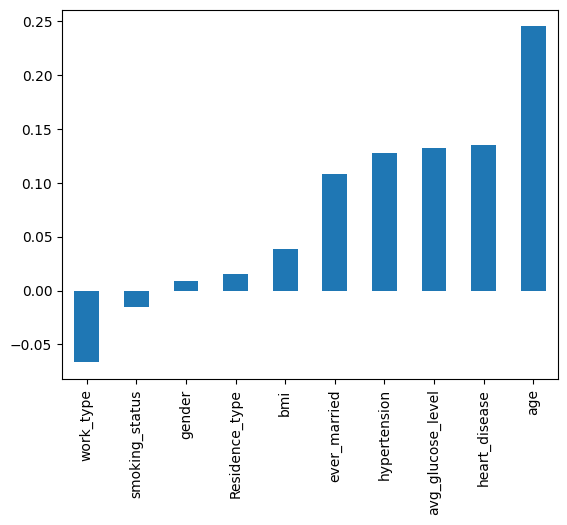

In [31]:

df.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

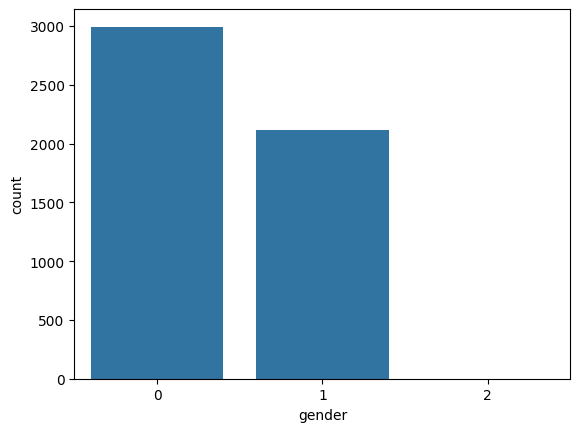

In [32]:
sns.countplot(x='gender', data=df)

<Axes: xlabel='smoking_status', ylabel='count'>

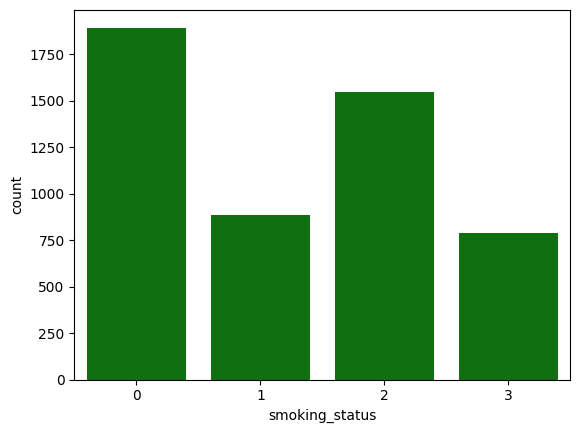

In [35]:
sns.countplot(x='smoking_status', data=df , color='green')

In [ ]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = df,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = df,hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = df,hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = df,hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = df,hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = df,hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = df,hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = df,hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = df,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = df,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = df,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = df,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = df,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = df,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = df,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = df,hue = 'smoking_status', ax=ax[3,3])

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [38]:
X_train ,  X_test, y_train, y_test = train_test_split(df.drop('stroke', axis=1), df['stroke'], test_size=0.2, random_state=42)


In [39]:
lr = LogisticRegression()


In [40]:
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9393346379647749

In [42]:
svm=SVC()

In [43]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9393346379647749

In [44]:
tree= DecisionTreeClassifier()


In [45]:
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.9080234833659491

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9403131115459883

In [50]:
y_pred_lr = lr.predict(X_test)
y_pred_svm= svm.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [54]:
print("Accuracy on LogicticRegression " , accuracy_score(y_test,y_pred_lr))
print("Accuracy on SVM " , accuracy_score(y_test,y_pred_svm))
print("Accuracy on Decision Tree " , accuracy_score(y_test,y_pred_tree))
print("Accuracy on KNeighborClassifier " , accuracy_score(y_test,y_pred_knn))



Accuracy on LogicticRegression  0.9393346379647749
Accuracy on SVM  0.9393346379647749
Accuracy on Decision Tree  0.9080234833659491
Accuracy on KNeighborClassifier  0.9403131115459883


In [65]:

up_tree= DecisionTreeClassifier(max_depth=2, random_state=42)

In [66]:
up_tree.fit(X_train , y_train)
up_tree.score(X_test,y_test)

0.9393346379647749